# **Assignment 1 - Individual Asignment**

**Fonseka K. N. N. - 216036B**

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk
import warnings
import re
import spacy
import string
from scipy import stats
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [123]:
full_df = pd.read_csv("/content/Reviews.csv", nrows=5000)
df = full_df[["Text"]]
df["Text"] = df["Text"].astype(str)
full_df.head()

<ipython-input-123-87fae7945705>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [124]:
df.head()

Text
0  I have bought several of the Vitality canned d...
1  Product arrived labeled as Jumbo Salted Peanut...
2  This is a confection that has been around a fe...
3  If you are looking for the secret ingredient i...
4  Great taffy at a great price.  There was a wid...

# ***Exploratory Data Analysis (EDA)***

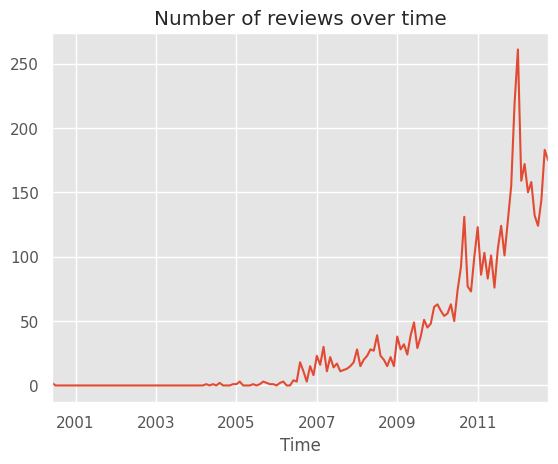

In [125]:
# Plot the number of reviews over time
full_df['Time'] = pd.to_datetime(full_df['Time'], unit='s')
full_df.set_index('Time', inplace=True)
full_df.resample('M').size().plot()
plt.title('Number of reviews over time')
plt.show()

In [126]:
# Check the top 10 users based on the number of reviews
top_users = full_df['UserId'].value_counts().head(10)
print(top_users)

UserId
A31N6KB160O508    5
A3NHUQ33CFH3VM    5
A3OXHLG6DIBRW8    5
A3PJZ8TU8FDQ1K    5
AY12DBB0U420B     5
A3RMGIKUWGPZOK    4
AR7TAEEUDHMUB     4
A2NLZ3M0OJV9NX    4
A2MUGFV2TDQ47K    4
A2R6RA8FRBS608    4
Name: count, dtype: int64


In [127]:
# Check the top 10 products based on the number of reviews
top_products = full_df['ProductId'].value_counts().head(10)
print(top_products)

ProductId
B005K4Q1VI    324
B001RVFDOO    305
B004391DK0    232
B000G6RYNE    217
B00139TT72    159
B002TMV3E4     96
B001E5E29A     88
B001EW5YQS     87
B0016FY6H6     76
B0089SPDUW     69
Name: count, dtype: int64


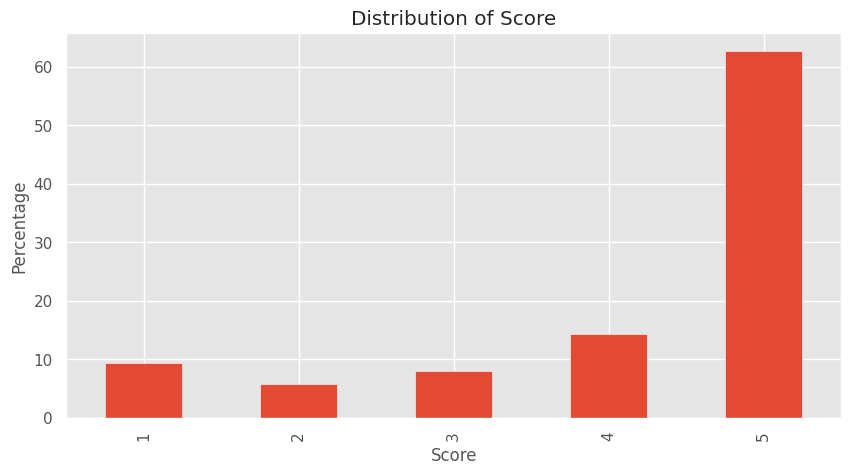

In [128]:
# 1. Data on Distribution of score
plt.figure(figsize=(10,5))
(full_df['Score'].value_counts(normalize=True) * 100).sort_index().plot(kind='bar')
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Percentage')
plt.show()


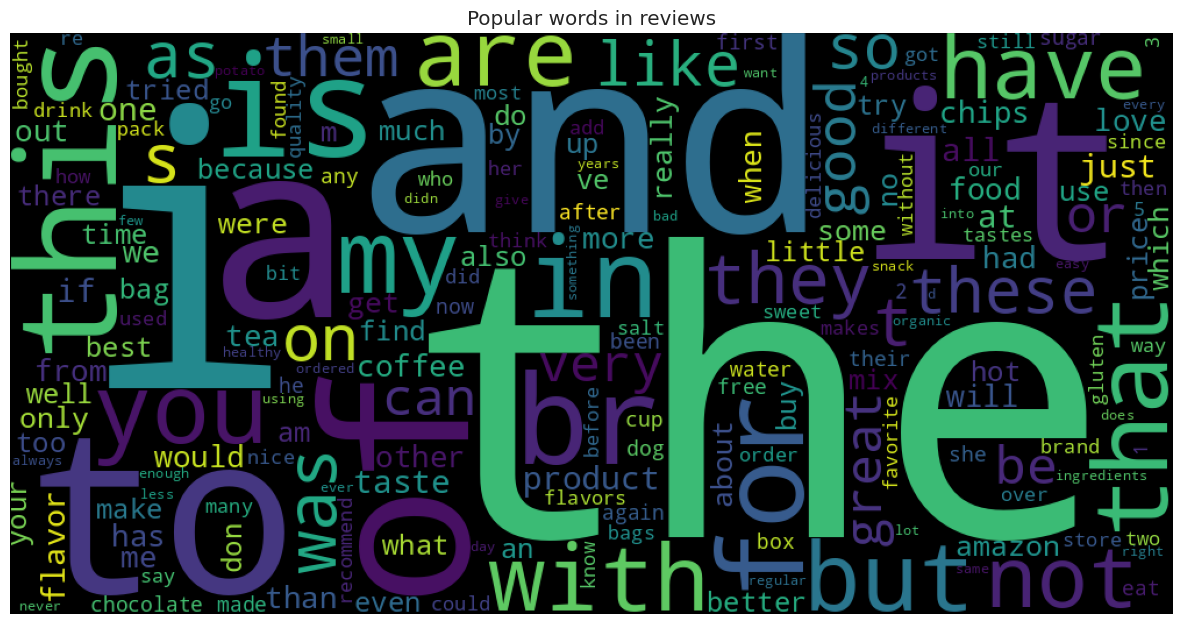

In [129]:
# 2. Popular words in reviews
from wordcloud import WordCloud

from collections import Counter
import re

words = []

for review in full_df['Text']:
    words.extend(re.findall(r'\b\w+\b', review.lower()))

word_freq = dict(Counter(words))

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_freq)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title('Popular words in reviews')
plt.axis("off")
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


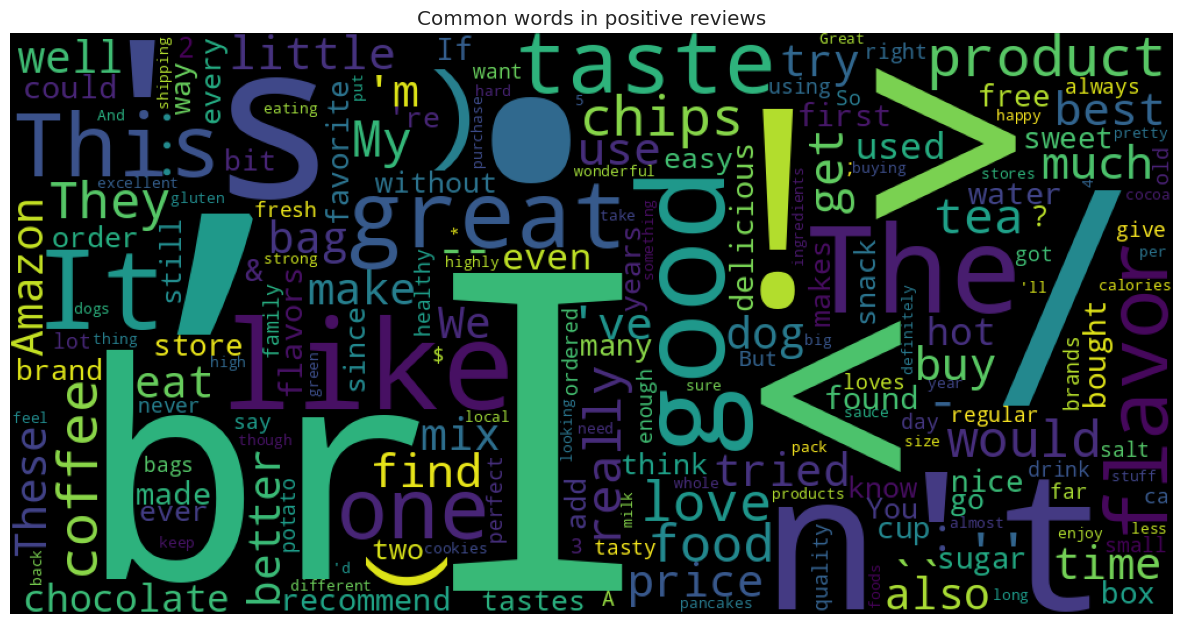

In [130]:
# 3. Common words in positive reviews

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

filtered_positive_sentence = [w for w in positive_word_tokens if not w in stop_words]

positive_reviews = full_df[full_df['Score'] > 3]['Text']
positive_word_tokens = word_tokenize(' '.join(positive_reviews))
filtered_positive_sentence = [w for w in positive_word_tokens if not w in stop_words]
positive_word_freq = Counter(filtered_positive_sentence)

positive_wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(positive_word_freq)
plt.figure(figsize=(15,8))
plt.imshow(positive_wordcloud)
plt.title('Common words in positive reviews')
plt.axis("off")
plt.show()

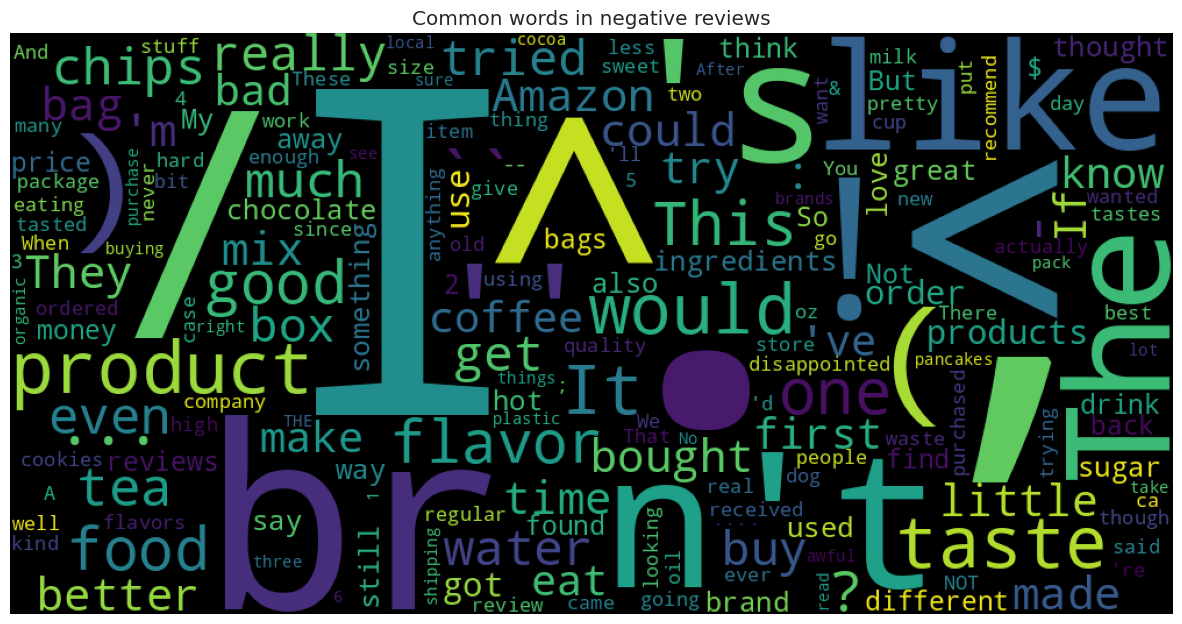

In [131]:
# 4. Common words in negative reviews
negative_reviews = full_df[full_df['Score'] < 3]['Text']
negative_word_tokens = word_tokenize(' '.join(negative_reviews))
filtered_negative_sentence = [w for w in negative_word_tokens if not w in stop_words]
negative_word_freq = Counter(filtered_negative_sentence)

# Word cloud for common words in negative reviews
negative_wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(negative_word_freq)
plt.figure(figsize=(15,8))
plt.imshow(negative_wordcloud)
plt.title('Common words in negative reviews')
plt.axis("off")
plt.show()


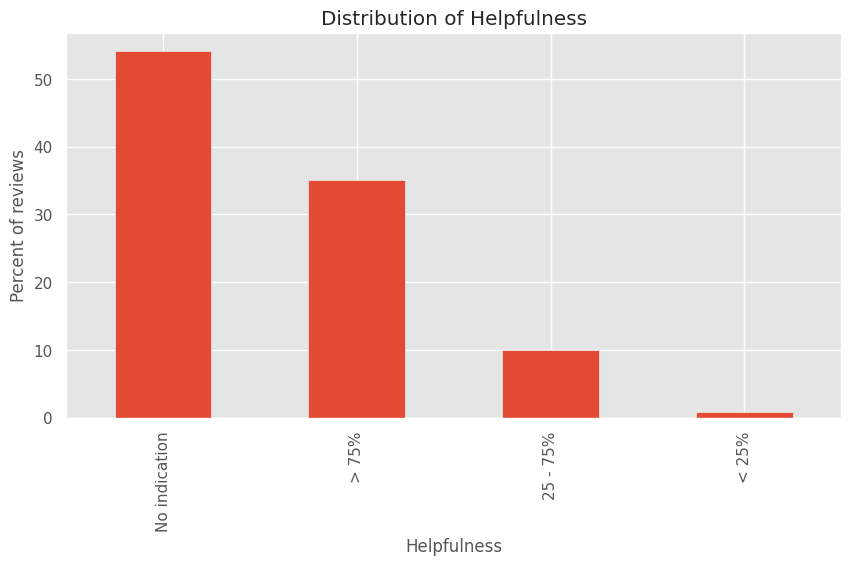

In [132]:
# 5. How many reviews are helpful?
full_df['helpfulness_ratio'] = full_df['HelpfulnessNumerator'] / full_df['HelpfulnessDenominator']
full_df['helpfulness_ratio'] = full_df['helpfulness_ratio'].fillna(0)

# Define helpfulness categories
def categorize_helpfulness(ratio):
    if ratio == 0:
        return 'No indication'
    elif ratio < 0.25:
        return '< 25%'
    elif ratio <= 0.75:
        return '25 - 75%'
    else:
        return '> 75%'

full_df['helpfulness_category'] = full_df['helpfulness_ratio'].apply(categorize_helpfulness)

# Plot distribution of helpfulness
plt.figure(figsize=(10,5))
(full_df['helpfulness_category'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.title('Distribution of Helpfulness')
plt.xlabel('Helpfulness')
plt.ylabel('Percent of reviews')
plt.show()


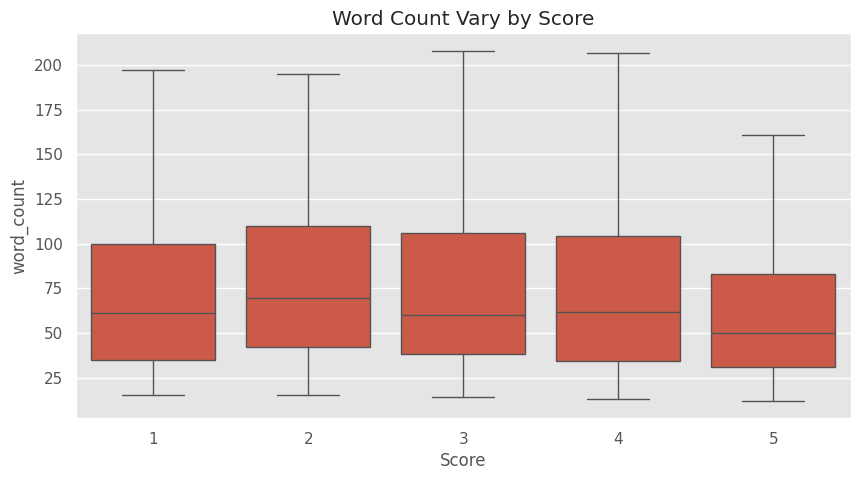

In [133]:
# Create a new column 'word_count' that contains the count of words in each review
full_df['word_count'] = full_df['Text'].apply(lambda x: len(str(x).split()))

# Now you can use 'word_count' for plotting
plt.figure(figsize=(10,5))
sns.boxplot(x='Score', y='word_count', data=full_df, showfliers=False)
plt.title('Word Count Vary by Score')
plt.show()


In [134]:
if all(col in full_df.columns for col in ['helpfulness_ratio', 'helpfulness_category', 'word_count']):
    full_df.drop(['helpfulness_ratio', 'helpfulness_category', 'word_count'], axis=1, inplace=True)
else:
    print("Columns not found in DataFrame. Skipping drop operation.")

# ***Preprocessing***

## **Tokenization**

In [135]:
import nltk
nltk.download('punkt')
df['Text_tokens'] = df['Text'].apply(nltk.word_tokenize)

df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-135-2ae048afa638>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                         Text_tokens  
0  [I, have, bought, several, of, the, Vitality, ...  
1  [Product, arrived, labeled, as, Jumbo, Salted,...  
2  [This, is, a, confection, that, has, been, aro...  
3  [If, you, are, looking, for, the, secret, ingr...  
4  [Great, taffy, at, a, great, price, ., There, ...

## **Lower Casing**

In [136]:
df["Text_lower"] = df["Text"].str.lower()
df.head()

<ipython-input-136-3378e15c8556>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                         Text_tokens  \
0  [I, have, bought, several, of, the, Vitality, ...   
1  [Product, arrived, labeled, as, Jumbo, Salted,...   
2  [This, is, a, confection, that, has, been, aro...   
3  [If, you, are, looking, for, the, secret, ingr...   
4  [Great, taffy, at, a, great, price, ., There, ...   

                                          Text_lower  
0  i have bought several of the vitality canned d...  
1  product arrived labeled as jumbo salted peanut...  
2  this is a confection that has been around a fe...  
3  if you are looking for the secret ingredient i...  
4  great taffy at a great price.  there was a wid...

# **Removal of Punctuations**

In [137]:
import string

df["Text_lower"] = df["Text"].str.lower()

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["Text_wo_punct"] = df["Text_lower"].apply(lambda text: remove_punctuation(text))

df.head()

<ipython-input-137-3899b787ad4c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-137-3899b787ad4c>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                         Text_tokens  \
0  [I, have, bought, several, of, the, Vitality, ...   
1  [Product, arrived, labeled, as, Jumbo, Salted,...   
2  [This, is, a, confection, that, has, been, aro...   
3  [If, you, are, looking, for, the, secret, ingr...   
4  [Great, taffy, at, a, great, price, ., There, ...   

                                          Text_lower  \
0  i have bought several of the vitality canned d...   
1  product arrived labeled as jumbo salted peanut...   
2  this is a confection that has been around a fe...   
3  if you are looking for the secret ingredient i...   
4  great taffy at a great price.  there was a wid...   

                                       Text_wo_punct  
0  i have bought several of the vitality canned d...  
1  product arrived labeled as jumbo salted peanut...  
2  this is a confection that has been around a fe...  
3  if you are looking for the secret ingredient i...  
4  great taffy at a great price  there was a wide...

# **Removal of stopwords**

In [138]:
if all(col in df.columns for col in ["Text_tokens","Text_lower"]):
    df.drop(["Text_tokens","Text_lower"], axis=1, inplace=True)
else:
    print("Columns not found in DataFrame. Skipping drop operation.")

<ipython-input-138-f39acf7ba974>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [139]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [140]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(Text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(Text).split() if word not in STOPWORDS])

df["Text_wo_stop"] = df["Text_wo_punct"].apply(lambda Text: remove_stopwords(Text))
df.head()

<ipython-input-140-db629e9a5b34>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                       Text_wo_punct  \
0  i have bought several of the vitality canned d...   
1  product arrived labeled as jumbo salted peanut...   
2  this is a confection that has been around a fe...   
3  if you are looking for the secret ingredient i...   
4  great taffy at a great price  there was a wide...   

                                        Text_wo_stop  
0  bought several vitality canned dog food produc...  
1  product arrived labeled jumbo salted peanutsth...  
2  confection around centuries light pillowy citr...  
3  looking secret ingredient robitussin believe f...  
4  great taffy great price wide assortment yummy ...

# **Removal of Frequent words**

In [141]:
from collections import Counter
cnt = Counter()
for Text in df["Text_wo_stop"].values:
    for word in Text.split():
        cnt[word] += 1

cnt.most_common(10)

[('br', 2154),
 ('like', 2020),
 ('good', 1741),
 ('great', 1450),
 ('taste', 1387),
 ('one', 1332),
 ('product', 1261),
 ('flavor', 1190),
 ('coffee', 1092),
 ('chips', 1062)]

In [142]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(Text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(Text).split() if word not in FREQWORDS])

df["Text_wo_stopfreq"] = df["Text_wo_stop"].apply(lambda Text: remove_freqwords(Text))
df.head()

<ipython-input-142-604aa43692bf>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                       Text_wo_punct  \
0  i have bought several of the vitality canned d...   
1  product arrived labeled as jumbo salted peanut...   
2  this is a confection that has been around a fe...   
3  if you are looking for the secret ingredient i...   
4  great taffy at a great price  there was a wide...   

                                        Text_wo_stop  \
0  bought several vitality canned dog food produc...   
1  product arrived labeled jumbo salted peanutsth...   
2  confection around centuries light pillowy citr...   
3  looking secret ingredient robitussin believe f...   
4  great taffy great price wide assortment yummy ...   

                                    Text_wo_stopfreq  
0  bought several vitality canned dog food produc...  
1  arrived labeled jumbo salted peanutsthe peanut...  
2  confection around centuries light pillowy citr...  
3  looking secret ingredient robitussin believe f...  
4  taffy price wide assortment yummy taffy delive...

# **Removal of Rare words**

In [143]:
from collections import Counter

cnt = Counter()
for Text in df["Text_wo_stop"].values:
  for word in Text.split():
    cnt[word] += 1

# Define threshold for rarity (e.g., words occurring less than 2 times)
n_rare_words = 10
rarity_threshold = 2  # Adjust this value as needed

# Find rare words (words with count less than threshold)
RAREWORDS = set(word for word, count in cnt.items() if count < rarity_threshold)

# Print the rarest n words (similar to most_common)
print("Most Rare Words:")
for word, count in cnt.most_common()[:-n_rare_words-1:-1]:
  if count < rarity_threshold:
    print(f"{word} (Count: {count})")

Most Rare Words:
welcomes (Count: 1)
overlysweet (Count: 1)
rainforest (Count: 1)
cheat (Count: 1)
dessertlike (Count: 1)
amsterdams (Count: 1)
elana (Count: 1)
nonfunctional (Count: 1)
novetly (Count: 1)
1015g (Count: 1)


In [144]:
if all(col in df.columns for col in ["Text_wo_punct"]):
    df.drop(["Text_wo_punct"], axis=1, inplace=True)
else:
    print("Columns not found in DataFrame. Skipping drop operation.")

<ipython-input-144-a0ee457e7df6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [145]:

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(Text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(Text).split() if word not in RAREWORDS])

df["Text_wo_stopfreqrare"] = df["Text_wo_stopfreq"].apply(lambda Text: remove_rarewords(Text))
df.head()

<ipython-input-145-5dc5b910637b>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                        Text_wo_stop  \
0  bought several vitality canned dog food produc...   
1  product arrived labeled jumbo salted peanutsth...   
2  confection around centuries light pillowy citr...   
3  looking secret ingredient robitussin believe f...   
4  great taffy great price wide assortment yummy ...   

                                    Text_wo_stopfreq  \
0  bought several vitality canned dog food produc...   
1  arrived labeled jumbo salted peanutsthe peanut...   
2  confection around centuries light pillowy citr...   
3  looking secret ingredient robitussin believe f...   
4  taffy price wide assortment yummy taffy delive...   

                                Text_wo_stopfreqrare  
0  bought several vitality canned dog food produc...  
1  arrived labeled jumbo salted peanutsthe peanut...  
2  confection around centuries light pillowy citr...  
3  looking secret ingredient robitussin believe f...  
4  taffy price wide assortment yummy taffy delive...

# **Stemming**

In [146]:
if all(col in df.columns for col in ["Text_wo_stop","Text_wo_stopfreq"]):
    df.drop(["Text_wo_stop","Text_wo_stopfreq"], axis=1, inplace=True)
else:
    print("Columns not found in DataFrame. Skipping drop operation.")

<ipython-input-146-de7e42ebeef6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [147]:
from nltk.stem.porter import PorterStemmer

# No need to drop these columns if you still want to use them later
# df.drop(["Text_wo_stopfreq", "Text_wo_stopfreqrare"], axis=1, inplace=True)

stemmer = PorterStemmer()

def stem_words(Text):
    return " ".join([stemmer.stem(word) for word in Text.split()])

# Apply stemming on the 'Text_wo_stopfreqrare' column
df["text_stemmed"] = df["Text_wo_stopfreqrare"].apply(lambda Text: stem_words(Text))

df.head()

<ipython-input-147-4b6a98028cf2>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                Text_wo_stopfreqrare  \
0  bought several vitality canned dog food produc...   
1  arrived labeled jumbo salted peanutsthe peanut...   
2  confection around centuries light pillowy citr...   
3  looking secret ingredient robitussin believe f...   
4  taffy price wide assortment yummy taffy delive...   

                                        text_stemmed  
0  bought sever vital can dog food product found ...  
1  arriv label jumbo salt peanutsth peanut actual...  
2  confect around centuri light pillowi citru gel...  
3  look secret ingredi robitussin believ found go...  
4  taffi price wide assort yummi taffi deliveri q...

In [148]:
from nltk.stem.snowball import SnowballStemmer
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

# **Lemmatization**

In [149]:
if all(col in df.columns for col in ["Text_wo_stopfreqrare"]):
    df.drop(["Text_wo_stopfreqrare"], axis=1, inplace=True)
else:
    print("Columns not found in DataFrame. Skipping drop operation.")

<ipython-input-149-d9fc245ad1d6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [150]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_words(Text):
    return " ".join([lemmatizer.lemmatize(word) for word in Text.split()])

# Apply lemmatization on the 'text_stemmed' column
df["text_lemmatized"] = df["text_stemmed"].apply(lambda Text: lemmatize_words(Text))

df.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-150-5999c472f0cf>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                        text_stemmed  \
0  bought sever vital can dog food product found ...   
1  arriv label jumbo salt peanutsth peanut actual...   
2  confect around centuri light pillowi citru gel...   
3  look secret ingredi robitussin believ found go...   
4  taffi price wide assort yummi taffi deliveri q...   

                                     text_lemmatized  
0  bought sever vital can dog food product found ...  
1  arriv label jumbo salt peanutsth peanut actual...  
2  confect around centuri light pillowi citru gel...  
3  look secret ingredi robitussin believ found go...  
4  taffi price wide assort yummi taffi deliveri q...

In [151]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

def lemmatize_words(Text):
    pos_tagged_Text = nltk.pos_tag(Text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_Text])

# Apply lemmatization on the 'text_stemmed' column
df["text_lemmatized"] = df["text_stemmed"].apply(lambda Text: lemmatize_words(Text))

df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
<ipython-input-151-ad6740e556f5>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                        text_stemmed  \
0  bought sever vital can dog food product found ...   
1  arriv label jumbo salt peanutsth peanut actual...   
2  confect around centuri light pillowi citru gel...   
3  look secret ingredi robitussin believ found go...   
4  taffi price wide assort yummi taffi deliveri q...   

                                     text_lemmatized  
0  buy sever vital can dog food product find qual...  
1  arriv label jumbo salt peanutsth peanut actual...  
2  confect around centuri light pillowi citru gel...  
3  look secret ingredi robitussin believ find get...  
4  taffi price wide assort yummi taffi deliveri q...

## **Removal of URLs and HTML tags**

In [152]:
# Check whether the text column have URL or HTML tags

import re

def has_url(text):
  """Checks if text contains a URL using regular expression"""
  url_regex = r"(?i)\b((?:https?://|www\d?\.|ftp\.)[\w .:/\-+%#?@&=-]*)"
  return bool(re.search(url_regex, text))

def has_html_tag(text):
  """Checks if text contains an HTML tag using regular expression"""
  html_tag_regex = r"<[^>]+>"
  return bool(re.search(html_tag_regex, text))

df["has_url"] = df["Text"].apply(has_url)
df["has_html_tag"] = df["Text"].apply(has_html_tag)

# Check for existence of URLs and HTML tags
print("Information about Text column:")
print(f"Number of rows with URLs: {df['has_url'].sum()}")
print(f"Number of rows with HTML tags: {df['has_html_tag'].sum()}")


Information about Text column:
Number of rows with URLs: 107
Number of rows with HTML tags: 1241


<ipython-input-152-f47abe6fa966>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-152-f47abe6fa966>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [153]:
#Remove URLs
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df["text_wo_url"] = df["text_lemmatized"].apply(lambda text: remove_urls(text))

df.head()

<ipython-input-153-5ef6dd170cee>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                        text_stemmed  \
0  bought sever vital can dog food product found ...   
1  arriv label jumbo salt peanutsth peanut actual...   
2  confect around centuri light pillowi citru gel...   
3  look secret ingredi robitussin believ found go...   
4  taffi price wide assort yummi taffi deliveri q...   

                                     text_lemmatized  has_url  has_html_tag  \
0  buy sever vital can dog food product find qual...    False         False   
1  arriv label jumbo salt peanutsth peanut actual...    False         False   
2  confect around centuri light pillowi citru gel...    False         False   
3  look secret ingredi robitussin believ find get...    False         False   
4  taffi price wide assort yummi taffi deliveri q...    False         False   

                                         text_wo_url  
0  buy sever vital can dog food product find qual...  
1  arriv label jumbo salt peanutsth peanut actual...  
2  confect around centuri light pillowi citru gel...  
3  look secret ingredi robitussin believ find get...  
4  taffi price wide assort yummi taffi deliveri q...

In [154]:
if all(col in df.columns for col in ["text_stemmed"]):
    df.drop(["text_stemmed"], axis=1, inplace=True)
else:
    print("Columns not found in DataFrame. Skipping drop operation.")

<ipython-input-154-477c9c4a4678>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [155]:
#Remove HTML tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

df["text_wo_html"] = df["text_wo_url"].apply(lambda text: remove_html(text))

df.head()

<ipython-input-155-2fbd0c4209f7>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                     text_lemmatized  has_url  has_html_tag  \
0  buy sever vital can dog food product find qual...    False         False   
1  arriv label jumbo salt peanutsth peanut actual...    False         False   
2  confect around centuri light pillowi citru gel...    False         False   
3  look secret ingredi robitussin believ find get...    False         False   
4  taffi price wide assort yummi taffi deliveri q...    False         False   

                                         text_wo_url  \
0  buy sever vital can dog food product find qual...   
1  arriv label jumbo salt peanutsth peanut actual...   
2  confect around centuri light pillowi citru gel...   
3  look secret ingredi robitussin believ find get...   
4  taffi price wide assort yummi taffi deliveri q...   

                                        text_wo_html  
0  buy sever vital can dog food product find qual...  
1  arriv label jumbo salt peanutsth peanut actual...  
2  confect around centuri light pillowi citru gel...  
3  look secret ingredi robitussin believ find get...  
4  taffi price wide assort yummi taffi deliveri q...

# **Spelling Correction**

In [156]:
!pip install pyspellchecker
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

text = "speling correctin"
print(correct_spellings(text))



spelling correcting


## **Handling missing values**

In [157]:
# Check for missing values in the entire DataFrame
missing_values = full_df.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Summary                   0
Text                      0
dtype: int64


## **Checking for Outliers**

In [158]:
# Check if all values in 'Score' column are between 1 and 5 (inclusive)
all_valid_scores = full_df['Score'].between(1, 5, inclusive='both').all()

if all_valid_scores:
  print("All values in 'Score' column are between 1 and 5.")
else:
  print("There are values in 'Score' column outside the range of 1 to 5.")


All values in 'Score' column are between 1 and 5.


## **Whitespace Normalization**

In [159]:
if all(col in df.columns for col in ["text_lemmatized","has_url", "has_html_tag", "text_wo_url"]):
    df.drop(["text_lemmatized","has_url", "has_html_tag", "text_wo_url"], axis=1, inplace=True)
else:
    print("Columns not found in DataFrame. Skipping drop operation.")

<ipython-input-159-3b6e5f855ed5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [160]:
def normalize_whitespace(text):
  """
  This function removes extra spaces and newlines from the text.
  """
  return re.sub(r"\s+", " ", text).strip()

# Apply the function to the 'text_wo_html' column
df["text_wo_html_normalized_whitespace"] = df["text_wo_html"].apply(normalize_whitespace)

df.head()

<ipython-input-160-48652c456038>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                        text_wo_html  \
0  buy sever vital can dog food product find qual...   
1  arriv label jumbo salt peanutsth peanut actual...   
2  confect around centuri light pillowi citru gel...   
3  look secret ingredi robitussin believ find get...   
4  taffi price wide assort yummi taffi deliveri q...   

                  text_wo_html_normalized_whitespace  
0  buy sever vital can dog food product find qual...  
1  arriv label jumbo salt peanutsth peanut actual...  
2  confect around centuri light pillowi citru gel...  
3  look secret ingredi robitussin believ find get...  
4  taffi price wide assort yummi taffi deliveri q...

## **Normalization of Abbreviations and Acronyms**

In [161]:
from collections import Counter

ABBREV_DICT = {
    "USA": "United States of America",
    "UK": "United Kingdom",
    "UN": "United Nations",
    "e.g.": "for example",
    "etc.": "and so on",
}

def has_abbreviations(text, abbrev_dict=ABBREV_DICT):
  """
  This function checks if a text contains any abbreviations from a given dictionary.

  Args:
      text: The text to check for abbreviations.
      abbrev_dict: A dictionary mapping abbreviations to their full forms (optional).

  Returns:
      True if the text contains at least one abbreviation, False otherwise.
  """

  # Split the text into words
  words = text.lower().split()  # Convert to lowercase for case-insensitive matching

  # Create a counter for word occurrences
  word_count = Counter(words)

  # Check if any words from the text are present in the abbreviation dictionary
  for abbreviation in abbrev_dict.keys():
    if abbreviation in word_count:
      return True  # Found an abbreviation

  return False  # No abbreviations found

# Assuming your abbreviation dictionary is defined as ABBREV_DICT

# Check for abbreviations in each row and count the number of rows with them
num_abbrev_rows = 0
for text in df["Text"]:
  if has_abbreviations(text):
    num_abbrev_rows += 1

# Print results
if num_abbrev_rows > 0:
  print(f"There are {num_abbrev_rows} rows containing abbreviations in 'Text' column.")
else:
  print("No abbreviations found in 'Text' column.")


There are 49 rows containing abbreviations in 'Text' column.


In [162]:
if all(col in df.columns for col in ["text_wo_html"]):
    df.drop(["text_wo_html"], axis=1, inplace=True)
else:
    print("Columns not found in DataFrame. Skipping drop operation.")

<ipython-input-162-6d79301c1fbe>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [163]:
# Sample abbreviation/acronym dictionary
ABBREV_DICT = {
    "USA": "United States of America",
    "UK": "United Kingdom",
    "UN": "United Nations",
    "e.g.": "for example",
    "etc.": "and so on",
}

def normalize_abbreviations(text):
  """
  This function replaces abbreviations/acronyms from a predefined dictionary.
  """
  for abbreviation, full_form in ABBREV_DICT.items():
    text = text.replace(abbreviation, full_form)
  return text

df["Text_normalized_abbrev"] = df["text_wo_html_normalized_whitespace"].apply(normalize_abbreviations)
df.head()

<ipython-input-163-1c4d8eef0976>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                  text_wo_html_normalized_whitespace  \
0  buy sever vital can dog food product find qual...   
1  arriv label jumbo salt peanutsth peanut actual...   
2  confect around centuri light pillowi citru gel...   
3  look secret ingredi robitussin believ find get...   
4  taffi price wide assort yummi taffi deliveri q...   

                              Text_normalized_abbrev  
0  buy sever vital can dog food product find qual...  
1  arriv label jumbo salt peanutsth peanut actual...  
2  confect around centuri light pillowi citru gel...  
3  look secret ingredi robitussin believ find get...  
4  taffi price wide assort yummi taffi deliveri q...

In [164]:
#adding Text_normalized_abbrev colum to full_df data frame
full_df['Text_normalized_abbrev'] = df['Text_normalized_abbrev'].values

In [165]:
# Rename the column
full_df = full_df.rename(columns={'Text_normalized_abbrev': 'processed text'})


In [49]:
full_df.head()

Id   ProductId          UserId                      ProfileName  \
Time                                                                          
2011-04-27   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
2012-09-07   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2008-08-18   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
2011-06-13   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
2012-10-21   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

            HelpfulnessNumerator  HelpfulnessDenominator  Score  \
Time                                                              
2011-04-27                     1                       1      5   
2012-09-07                     0                       0      1   
2008-08-18                     1                       1      4   
2011-06-13                     3                       3      2   
2012-10-21                     0                       0      5   

                          Summary  \
Time                                
2011-04-27  Good Quality Dog Food   
2012-09-07      Not as Advertised   
2008-08-18  "Delight" says it all   
2011-06-13         Cough Medicine   
2012-10-21            Great taffy   

                                                         Text  \
Time                                                            
2011-04-27  I have bought several of the Vitality canned d...   
2012-09-07  Product arrived labeled as Jumbo Salted Peanut...   
2008-08-18  This is a confection that has been around a fe...   
2011-06-13  If you are looking for the secret ingredient i...   
2012-10-21  Great taffy at a great price.  There was a wid...   

                                               processed text  
Time                                                           
2011-04-27  buy sever vital can dog food product find qual...  
2012-09-07  arriv label jumbo salt peanutsth peanut actual...  
2008-08-18  confect around centuri light pillowi citru gel...  
2011-06-13  look secret ingredi robitussin believ find get...  
2012-10-21  taffi price wide assort yummi taffi deliveri q...

# **Text Analytics**

## **Sentiment Analysis (Lexicon-Based Approach)**

In [166]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize Vader's SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

def sentiment_analysis_lexicon(text):
  """
  This function uses Vader's SentimentIntensityAnalyzer for sentiment analysis.
  """
  sentiment = vader.polarity_scores(text)
  return sentiment["compound"]  # Returns a compound score between -1 (negative) and 1 (positive)

full_df["sentiment_score"] = full_df["processed text"].apply(sentiment_analysis_lexicon)

# Analyze sentiment distribution
full_df["sentiment"] = full_df["sentiment_score"].apply(lambda score: "Positive" if score > 0 else ("Negative" if score < 0 else "Neutral"))
print(full_df["sentiment"].value_counts())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


sentiment
Positive    3881
Negative     703
Neutral      416
Name: count, dtype: int64


In [167]:
full_df.head()

Id   ProductId          UserId                      ProfileName  \
Time                                                                          
2011-04-27   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
2012-09-07   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2008-08-18   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
2011-06-13   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
2012-10-21   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

            HelpfulnessNumerator  HelpfulnessDenominator  Score  \
Time                                                              
2011-04-27                     1                       1      5   
2012-09-07                     0                       0      1   
2008-08-18                     1                       1      4   
2011-06-13                     3                       3      2   
2012-10-21                     0                       0      5   

                          Summary  \
Time                                
2011-04-27  Good Quality Dog Food   
2012-09-07      Not as Advertised   
2008-08-18  "Delight" says it all   
2011-06-13         Cough Medicine   
2012-10-21            Great taffy   

                                                         Text  \
Time                                                            
2011-04-27  I have bought several of the Vitality canned d...   
2012-09-07  Product arrived labeled as Jumbo Salted Peanut...   
2008-08-18  This is a confection that has been around a fe...   
2011-06-13  If you are looking for the secret ingredient i...   
2012-10-21  Great taffy at a great price.  There was a wid...   

                                               processed text  \
Time                                                            
2011-04-27  buy sever vital can dog food product find qual...   
2012-09-07  arriv label jumbo salt peanutsth peanut actual...   
2008-08-18  confect around centuri light pillowi citru gel...   
2011-06-13  look secret ingredi robitussin believ find get...   
2012-10-21  taffi price wide assort yummi taffi deliveri q...   

            sentiment_score sentiment  
Time                                   
2011-04-27           0.7351  Positive  
2012-09-07          -0.1027  Negative  
2008-08-18           0.6249  Positive  
2011-06-13           0.0000   Neutral  
2012-10-21           0.5859  Positive

In [168]:
import plotly.graph_objects as go

# Distribution of Sentiment based on Rating

r1 = full_df[full_df['Score'] == 1]['sentiment']
r2 = full_df[full_df['Score'] == 2]['sentiment']
r3 = full_df[full_df['Score'] == 3]['sentiment']
r4 = full_df[full_df['Score'] == 4]['sentiment']
r5 = full_df[full_df['Score'] == 5]['sentiment']

rat1 = go.Histogram(x=r1, name='1', opacity=0.5)
rat2 = go.Histogram(x=r2, name='2', opacity=0.6)
rat3 = go.Histogram(x=r3, name='3', opacity=0.7)
rat4 = go.Histogram(x=r4, name='4', opacity=0.8)
rat5 = go.Histogram(x=r5, name='5', opacity=0.9)

data = [rat1, rat2, rat3, rat4, rat5]
layout = go.Layout(barmode='stack', title='Distribution of Sentiment of Reviews Based On The Score')
fig = go.Figure(data=data, layout=layout)
fig.show()

## **nltk's Sentiment Intensity Analyzer (breakdown)**

In [169]:
text1 = full_df["processed text"].values[1]
text1

'arriv label jumbo salt peanutsth peanut actual small size unsalt sure error vendor intend repres jumbo'

In [170]:
!pip install twython

In [171]:
# Valence Aware Dictionary and sEntiment Reasoner
# Bag of Words Approach
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [172]:
sia.polarity_scores('2304')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [173]:
vader.polarity_scores(full_df["processed text"].values[0])

{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.7351}

In [174]:
# Defining a function to apply the Analyzer across the entire dataset.
def vaders(row):
  """
  This function analyzes the sentiment of a text using VADER sentiment analyzer.

  Args:
      row: A pandas Series representing a row from the DataFrame.

  Returns:
      A tuple containing sentiment scores (negative, neutral, positive, compound).
  """
  scores = vader.polarity_scores(row["processed text"])
  return scores['neg'], scores['neu'], scores['pos'], scores['compound']


In [175]:
full_df[['vaders_neg', 'vaders_neu', 'vaders_pos', 'vaders_com']] = \
    full_df.apply(vaders, axis=1, result_type='expand')

In [60]:
display(full_df.columns, full_df.head(2))

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Summary', 'Text', 'processed text',
       'sentiment_score', 'sentiment', 'vaders_neg', 'vaders_neu',
       'vaders_pos', 'vaders_com'],
      dtype='object')

Id   ProductId          UserId ProfileName  HelpfulnessNumerator  \
Time                                                                           
2011-04-27   1  B001E4KFG0  A3SGXH7AUHU8GW  delmartian                     1   
2012-09-07   2  B00813GRG4  A1D87F6ZCVE5NK      dll pa                     0   

            HelpfulnessDenominator  Score                Summary  \
Time                                                               
2011-04-27                       1      5  Good Quality Dog Food   
2012-09-07                       0      1      Not as Advertised   

                                                         Text  \
Time                                                            
2011-04-27  I have bought several of the Vitality canned d...   
2012-09-07  Product arrived labeled as Jumbo Salted Peanut...   

                                               processed text  \
Time                                                            
2011-04-27  buy sever vital can dog food product find qual...   
2012-09-07  arriv label jumbo salt peanutsth peanut actual...   

            sentiment_score sentiment  vaders_neg  vaders_neu  vaders_pos  \
Time                                                                        
2011-04-27           0.7351  Positive       0.000       0.690       0.310   
2012-09-07          -0.1027  Negative       0.142       0.737       0.121   

            vaders_com  
Time                    
2011-04-27      0.7351  
2012-09-07     -0.1027

<ipython-input-176-a89ac33528b0>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




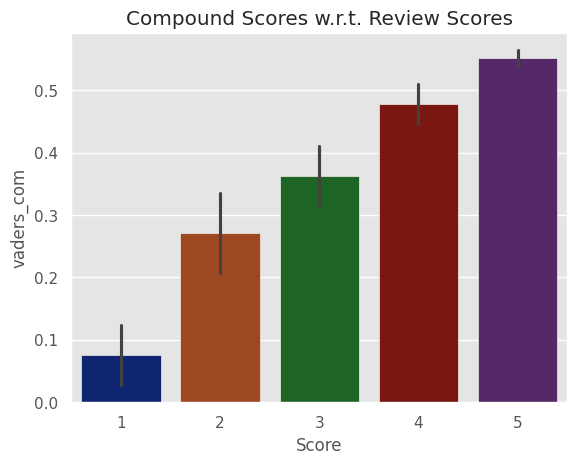

In [176]:
ax = sns.barplot(data=full_df, x='Score', y='vaders_com',
#                  hue='score',
                 palette='dark')

ax.legends_ = None
ax.set_title('Compound Scores w.r.t. Review Scores')

plt.show()

<ipython-input-177-25ae4bc469a5>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-177-25ae4bc469a5>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-177-25ae4bc469a5>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




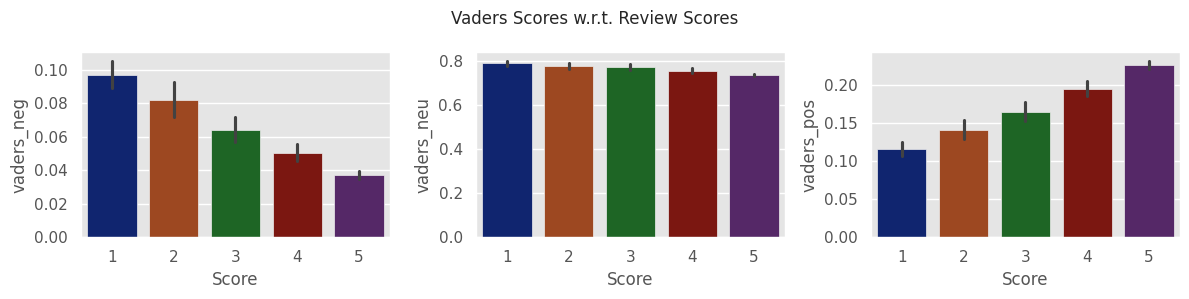

In [177]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3), tight_layout=True)

for i, d in enumerate(['vaders_neg', 'vaders_neu', 'vaders_pos']):
    sns.barplot(data=full_df, x='Score', y=d,
#                          hue='score',
                         palette='dark', ax=axs[i])
    axs[i].legend_ = None
#     break

fig.suptitle('Vaders Scores w.r.t. Review Scores')
plt.show()

## **Topic Modeling (LDA, LSA)**

In [178]:
!pip install gensim nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from gensim import corpora
from gensim.models import LdaModel, LsiModel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [179]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

def prepare_corpus(doc_clean):
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary, doc_term_matrix


In [180]:
doc_clean = [clean(doc).split() for doc in full_df['processed text']]
dictionary, doc_term_matrix = prepare_corpus(doc_clean)


In [181]:
# LDA
lda_model = LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50)

# LSA
lsa_model = LsiModel(doc_term_matrix, num_topics=5, id2word = dictionary)


In [182]:
# Print LDA topics
print(lda_model.print_topics(num_topics=5, num_words=5))

# Print LSA topics
print(lsa_model.print_topics(num_topics=5, num_words=5))


[(0, '0.025*"make" + 0.023*"mix" + 0.019*"use" + 0.014*"pancak" + 0.011*"gluten"'), (1, '0.029*"food" + 0.024*"dog" + 0.009*"eat" + 0.008*"love" + 0.008*"get"'), (2, '0.020*"tea" + 0.010*"drink" + 0.009*"get" + 0.009*"use" + 0.007*"water"'), (3, '0.013*"sauc" + 0.009*"oil" + 0.008*"coconut" + 0.007*"water" + 0.007*"sugar"'), (4, '0.012*"love" + 0.012*"buy" + 0.011*"tri" + 0.011*"chocol" + 0.008*"get"')]
[(0, '0.241*"make" + 0.228*"food" + 0.218*"use" + 0.199*"get" + 0.180*"tri"'), (1, '-0.593*"food" + 0.432*"tea" + -0.423*"dog" + -0.189*"eat" + 0.156*"use"'), (2, '0.747*"tea" + 0.244*"food" + 0.215*"dog" + -0.210*"mix" + -0.208*"make"'), (3, '0.371*"mix" + 0.366*"make" + 0.306*"use" + -0.250*"bag" + 0.211*"pancak"'), (4, '0.444*"bag" + -0.384*"chocol" + -0.325*"oreo" + -0.239*"cooki" + -0.183*"hot"')]


In [183]:
# Print LDA topics (Top 4)
print("**Top Words per Topic (LDA):**")
lda_topics = lda_model.print_topics(num_topics=4, num_words=5)
for i, topic in enumerate(lda_topics):
  print(f"Topic {i+1}: {topic}")

# Print LSA topics (Top 4)
print("\n**Top Words per Topic (LSA):**")
lsa_topics = lsa_model.print_topics(num_topics=4, num_words=5)
for i, topic in enumerate(lsa_topics):
  print(f"Topic {i+1}: {topic}")


**Top Words per Topic (LDA):**
Topic 1: (4, '0.012*"love" + 0.012*"buy" + 0.011*"tri" + 0.011*"chocol" + 0.008*"get"')
Topic 2: (0, '0.025*"make" + 0.023*"mix" + 0.019*"use" + 0.014*"pancak" + 0.011*"gluten"')
Topic 3: (2, '0.020*"tea" + 0.010*"drink" + 0.009*"get" + 0.009*"use" + 0.007*"water"')
Topic 4: (3, '0.013*"sauc" + 0.009*"oil" + 0.008*"coconut" + 0.007*"water" + 0.007*"sugar"')

**Top Words per Topic (LSA):**
Topic 1: (0, '0.241*"make" + 0.228*"food" + 0.218*"use" + 0.199*"get" + 0.180*"tri"')
Topic 2: (1, '-0.593*"food" + 0.432*"tea" + -0.423*"dog" + -0.189*"eat" + 0.156*"use"')
Topic 3: (2, '0.747*"tea" + 0.244*"food" + 0.215*"dog" + -0.210*"mix" + -0.208*"make"')
Topic 4: (3, '0.371*"mix" + 0.366*"make" + 0.306*"use" + -0.250*"bag" + 0.211*"pancak"')


In [184]:
# Function to assign the most relevant topic to each document
def assign_topic(document):
    bow = dictionary.doc2bow(document)
    topics = lda_model.get_document_topics(bow)
    # Get the topic with the highest contribution
    max_contrib = max(topics, key=lambda x: x[1])
    return max_contrib[0]

# Assign the most relevant topic to each document using list comprehension
full_df["topic"] = [assign_topic(doc) for doc in doc_clean]

# Group by topic and calculate mean sentiment score for each topic
topic_sentiment = full_df.groupby('topic')['sentiment_score'].mean().reset_index()

# Sort by sentiment score
topic_sentiment = topic_sentiment.sort_values(by='sentiment_score', ascending=False)

print(topic_sentiment)



   topic  sentiment_score
0      0         0.508562
4      4         0.473661
2      2         0.446846
3      3         0.438554
1      1         0.430951


In [185]:
# Assigning Themes

def get_themes(model, topn=10):
    """
    This function takes a model (LDA, LSA, etc.) and an optional topn parameter
    which indicates how many words per topic to display. It prints out the top words for each topic.
    """
    for i in range(model.num_topics):
        print(f"Topic #{i+1}:")
        top_words = model.show_topic(i, topn)
        theme = ", ".join([word for word, _ in top_words])
        print(f"Theme: {theme}\n")

# Get themes for LDA model
get_themes(lda_model)

# Get themes for LSA model
get_themes(lsa_model)


Topic #1:
Theme: make, mix, use, pancak, gluten, free, tri, find, bisquick, recip

Topic #2:
Theme: food, dog, eat, love, get, buy, newman, use, year, well

Topic #3:
Theme: tea, drink, get, use, water, make, order, tri, cup, would

Topic #4:
Theme: sauc, oil, coconut, water, sugar, organ, juic, use, ingredi, natur

Topic #5:
Theme: love, buy, tri, chocol, get, bag, eat, flavor, find, hot

Topic #1:
Theme: make, food, use, get, tri, buy, bag, eat, love, tea

Topic #2:
Theme: food, tea, dog, eat, use, drink, water, cat, green, make

Topic #3:
Theme: tea, food, dog, mix, make, green, drink, pancak, chocol, use

Topic #4:
Theme: mix, make, use, bag, pancak, chocol, oreo, food, dog, tea

Topic #5:
Theme: bag, chocol, oreo, cooki, hot, potato, buy, nabisco, calori, mini



In [186]:
# Define a dictionary mapping top words to themes
theme_mapping = {
    "food": "Food Preparation",
    "dog": "Pet Care",
    "love": "Emotional Well-being",
    "eat": "Food Consumption",
    "newman": "Undefined",
    "get": "Acquisition",
    "year": "Time",
    "buy": "Purchase",
    "organ": "Health",
    "well": "Wellness",
    "make": "Food Preparation",
    "tea": "Beverage",
    "use": "Utilization",
    "mix": "Combination",
    "try": "Experimentation",
    "pancake": "Breakfast",
    "cup": "Container",
    "drink": "Consumption",
    "water": "Hydration",
    "find": "Discovery",
    "work": "Employment",
    "would": "Conditional",
    "mic": "Undefined",
    "say": "Communication",
    "icicle": "Seasonal",
    "go": "Movement",
    "record": "Documentation",
    "salt": "Seasoning",
    "bag": "Container",
    "snack": "Food Consumption",
    "flavor": "Taste",
    "potato": "Food Ingredient",
    "calorie": "Nutrition"
    # Add more mappings as needed
}

# Function to map top words to themes and create a proper theme
def map_to_theme(top_words):
    mapped_themes = [theme_mapping[word] for word in top_words if word in theme_mapping]
    unique_themes = set(mapped_themes)  # Remove duplicates
    return ", ".join(unique_themes)

# Example usage:
top_words = ["salt", "love", "eat", "bag", "snack", "try", "flavor", "potato", "calorie", "make"]
theme = map_to_theme(top_words)
print(theme)


Food Preparation, Nutrition, Food Ingredient, Seasoning, Taste, Food Consumption, Container, Experimentation, Emotional Well-being


In [187]:
# Function to assign themes to all rows in the dataset
def assign_themes_to_dataset(df, lsa_model):
    theme_assignments_list = []
    for _, row in df.iterrows():
        topic_idx = row['topic']  # Assuming 'topic' contains topic indices
        topic_words = lsa_model.show_topic(topic_idx)  # Get the top words for the topic
        theme = assign_theme([word for word, _ in topic_words])
        theme_assignments_list.append(theme)
    return theme_assignments_list

# Assign themes to all rows in the dataset
full_df['Topic_Themes'] = assign_themes_to_dataset(full_df, lsa_model)

# Print the assigned themes for each row
print(full_df[['Text', 'Topic_Themes']])




                                                         Text  \
Time                                                            
2011-04-27  I have bought several of the Vitality canned d...   
2012-09-07  Product arrived labeled as Jumbo Salted Peanut...   
2008-08-18  This is a confection that has been around a fe...   
2011-06-13  If you are looking for the secret ingredient i...   
2012-10-21  Great taffy at a great price.  There was a wid...   
...                                                       ...   
2012-07-03  I really wanted to like these.<br /><br />Firs...   
2012-07-01  I was not impressed with these cookies when I ...   
2012-05-11  The cookies came sealed and seem to be high qu...   
2012-07-13  These taste very good, but aren't like the BES...   
2012-05-26  I love these cookies. I am on the paleo diet r...   

                Topic_Themes  
Time                          
2011-04-27  Food Preparation  
2012-09-07  Food Preparation  
2008-08-18   Undefined Theme  

<ipython-input-188-5fab5005c6ca>:24: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



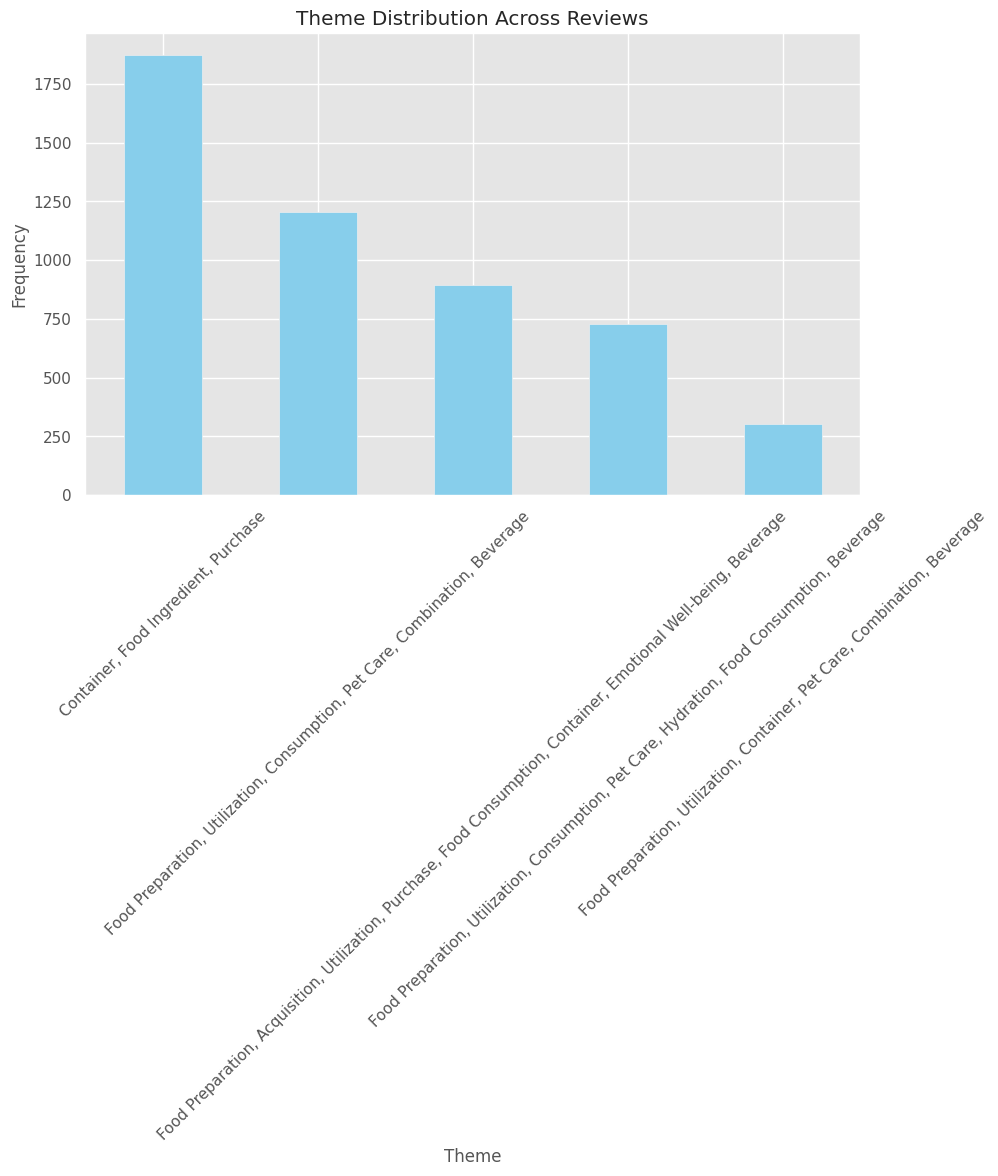

In [188]:
# Function to map top words to themes for all rows
def map_themes_to_all_rows(df, lsa_model):
    theme_list = []
    for _, row in df.iterrows():
        topic_idx = row['topic']  # Assuming 'topic' contains topic indices
        topic_words = lsa_model.show_topic(topic_idx)  # Get the top words for the topic
        theme = map_to_theme([word for word, _ in topic_words])
        theme_list.append(theme)
    return theme_list

# Map themes to all rows in the dataset
full_df['Topic_Themes'] = map_themes_to_all_rows(full_df, lsa_model)

# Calculate topic distribution counts
topic_distribution_counts = full_df['Topic_Themes'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
topic_distribution_counts.head(5).plot(kind='bar', color='skyblue')
plt.xlabel('Theme')
plt.ylabel('Frequency')
plt.title('Theme Distribution Across Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-189-d51242148e74>:12: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



<Figure size 1200x800 with 0 Axes>

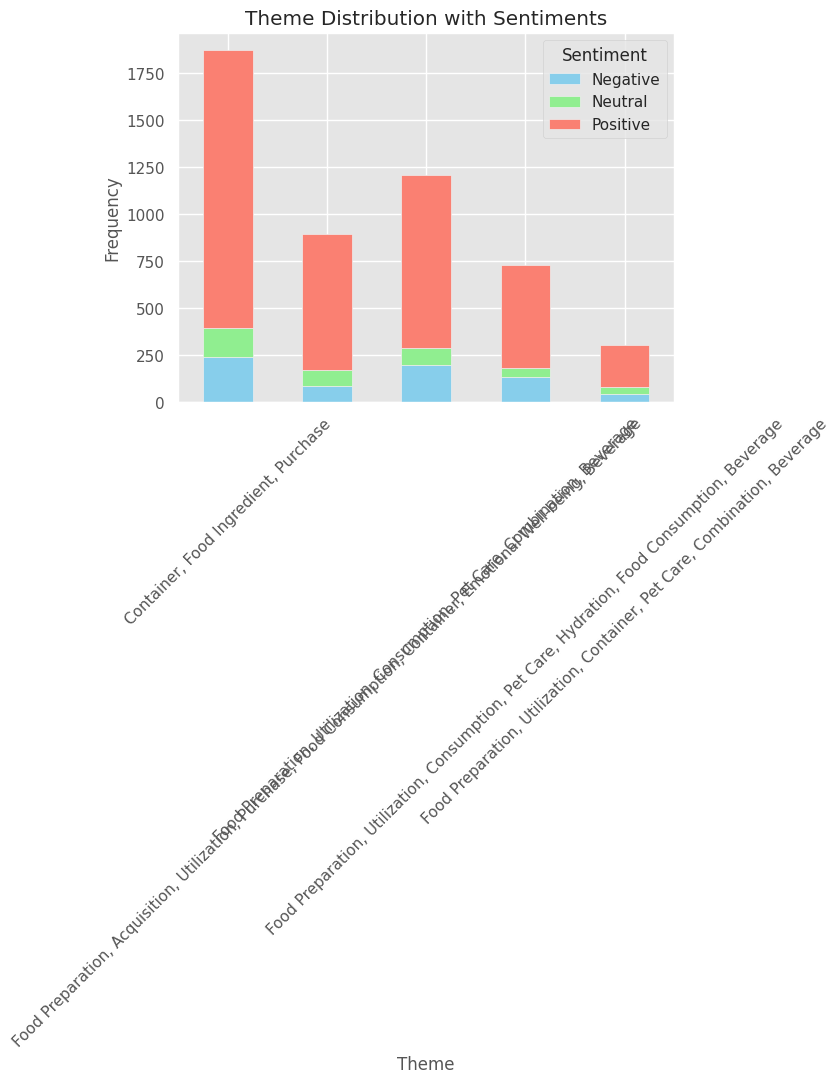

In [189]:
# Group by both 'Topic_Themes' and 'Sentiment', and count occurrences
theme_sentiment_distribution = full_df.groupby(['Topic_Themes', 'sentiment']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
theme_sentiment_distribution.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Theme')
plt.ylabel('Frequency')
plt.title('Theme Distribution with Sentiments')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

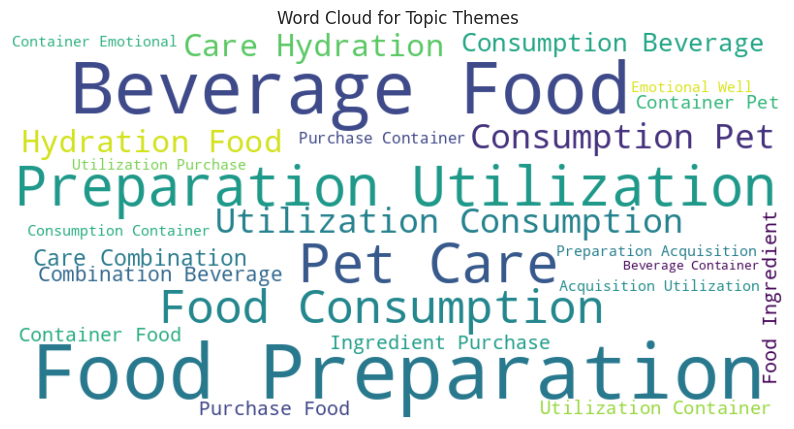

In [110]:
from wordcloud import WordCloud

# Combine all theme words into a single string
theme_words_combined = ' '.join(full_df['Topic_Themes'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(theme_words_combined)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Topic Themes")
plt.axis('off')
plt.show()





In [190]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# Assuming 'full_df' contains your DataFrame with the 'Topic_Themes' column

# Tokenize theme words
texts = [theme.split() for theme in full_df['Topic_Themes'].tolist()]

# Create a dictionary
dictionary = Dictionary(texts)

# Filter extremes
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Convert to bag-of-words format
corpus = [dictionary.doc2bow(text) for text in texts]

# Compute coherence score for initial LSA model
lsa_model = LsiModel(corpus, id2word=dictionary, num_topics=5)  # Adjust the number of topics as needed
coherence_model = CoherenceModel(model=lsa_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print("Coherence Score:", coherence_score)

Coherence Score: 0.3636625890259448


In [191]:
full_df.head()

Id   ProductId          UserId                      ProfileName  \
Time                                                                          
2011-04-27   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
2012-09-07   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2008-08-18   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
2011-06-13   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
2012-10-21   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

            HelpfulnessNumerator  HelpfulnessDenominator  Score  \
Time                                                              
2011-04-27                     1                       1      5   
2012-09-07                     0                       0      1   
2008-08-18                     1                       1      4   
2011-06-13                     3                       3      2   
2012-10-21                     0                       0      5   

                          Summary  \
Time                                
2011-04-27  Good Quality Dog Food   
2012-09-07      Not as Advertised   
2008-08-18  "Delight" says it all   
2011-06-13         Cough Medicine   
2012-10-21            Great taffy   

                                                         Text  \
Time                                                            
2011-04-27  I have bought several of the Vitality canned d...   
2012-09-07  Product arrived labeled as Jumbo Salted Peanut...   
2008-08-18  This is a confection that has been around a fe...   
2011-06-13  If you are looking for the secret ingredient i...   
2012-10-21  Great taffy at a great price.  There was a wid...   

                                               processed text  \
Time                                                            
2011-04-27  buy sever vital can dog food product find qual...   
2012-09-07  arriv label jumbo salt peanutsth peanut actual...   
2008-08-18  confect around centuri light pillowi citru gel...   
2011-06-13  look secret ingredi robitussin believ find get...   
2012-10-21  taffi price wide assort yummi taffi deliveri q...   

            sentiment_score sentiment  vaders_neg  vaders_neu  vaders_pos  \
Time                                                                        
2011-04-27           0.7351  Positive       0.000       0.690       0.310   
2012-09-07          -0.1027  Negative       0.142       0.737       0.121   
2008-08-18           0.6249  Positive       0.141       0.636       0.223   
2011-06-13           0.0000   Neutral       0.000       1.000       0.000   
2012-10-21           0.5859  Positive       0.000       0.725       0.275   

            vaders_com  topic  \
Time                            
2011-04-27      0.7351      1   
2012-09-07     -0.1027      2   
2008-08-18      0.6249      4   
2011-06-13      0.0000      0   
2012-10-21      0.5859      4   

                                                 Topic_Themes  
Time                                                           
2011-04-27  Food Preparation, Utilization, Consumption, Pe...  
2012-09-07  Food Preparation, Utilization, Consumption, Pe...  
2008-08-18               Container, Food Ingredient, Purchase  
2011-06-13  Food Preparation, Acquisition, Utilization, Pu...  
2012-10-21               Container, Food Ingredient, Purchase

## **Named Entity Recognition**

In [192]:
import spacy

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

# Function to extract named entities
def extract_named_entities(text):
  doc = nlp(text)
  return [(ent.text, ent.label_) for ent in doc.ents]

# Apply function to 'processed text' column
full_df['named_entities'] = full_df['processed text'].apply(extract_named_entities)

In [193]:
full_df.head()

Id   ProductId          UserId                      ProfileName  \
Time                                                                          
2011-04-27   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
2012-09-07   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2008-08-18   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
2011-06-13   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
2012-10-21   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

            HelpfulnessNumerator  HelpfulnessDenominator  Score  \
Time                                                              
2011-04-27                     1                       1      5   
2012-09-07                     0                       0      1   
2008-08-18                     1                       1      4   
2011-06-13                     3                       3      2   
2012-10-21                     0                       0      5   

                          Summary  \
Time                                
2011-04-27  Good Quality Dog Food   
2012-09-07      Not as Advertised   
2008-08-18  "Delight" says it all   
2011-06-13         Cough Medicine   
2012-10-21            Great taffy   

                                                         Text  \
Time                                                            
2011-04-27  I have bought several of the Vitality canned d...   
2012-09-07  Product arrived labeled as Jumbo Salted Peanut...   
2008-08-18  This is a confection that has been around a fe...   
2011-06-13  If you are looking for the secret ingredient i...   
2012-10-21  Great taffy at a great price.  There was a wid...   

                                               processed text  \
Time                                                            
2011-04-27  buy sever vital can dog food product find qual...   
2012-09-07  arriv label jumbo salt peanutsth peanut actual...   
2008-08-18  confect around centuri light pillowi citru gel...   
2011-06-13  look secret ingredi robitussin believ find get...   
2012-10-21  taffi price wide assort yummi taffi deliveri q...   

            sentiment_score sentiment  vaders_neg  vaders_neu  vaders_pos  \
Time                                                                        
2011-04-27           0.7351  Positive       0.000       0.690       0.310   
2012-09-07          -0.1027  Negative       0.142       0.737       0.121   
2008-08-18           0.6249  Positive       0.141       0.636       0.223   
2011-06-13           0.0000   Neutral       0.000       1.000       0.000   
2012-10-21           0.5859  Positive       0.000       0.725       0.275   

            vaders_com  topic  \
Time                            
2011-04-27      0.7351      1   
2012-09-07     -0.1027      2   
2008-08-18      0.6249      4   
2011-06-13      0.0000      0   
2012-10-21      0.5859      4   

                                                 Topic_Themes  \
Time                                                            
2011-04-27  Food Preparation, Utilization, Consumption, Pe...   
2012-09-07  Food Preparation, Utilization, Consumption, Pe...   
2008-08-18               Container, Food Ingredient, Purchase   
2011-06-13  Food Preparation, Acquisition, Utilization, Pu...   
2012-10-21               Container, Food Ingredient, Purchase   

                                               named_entities  
Time                                                           
2011-04-27                                                 []  
2012-09-07  [(arriv label jumbo salt peanutsth peanut actu...  
2008-08-18   [(citru gelatin, PERSON), (filbert cut, PERSON)]  
2011-06-13                      [(robitussin believ, PERSON)]  
2012-10-21             [(yummi taffi deliveri quick, PERSON)]

In [194]:
#Counting Named Entities

# Flatten the list of named entities
all_entities = [ent for ents in full_df['named_entities'] for ent in ents]

# Count occurrences of each named entity
entity_counts = Counter(all_entities)

# Print the most common named entities
print(entity_counts.most_common(10))


[(('first', 'ORDINAL'), 436), (('two', 'CARDINAL'), 282), (('2', 'CARDINAL'), 224), (('3', 'CARDINAL'), 155), (('5', 'CARDINAL'), 142), (('4', 'CARDINAL'), 135), (('100', 'CARDINAL'), 127), (('1', 'CARDINAL'), 118), (('three', 'CARDINAL'), 117), (('12', 'CARDINAL'), 111)]


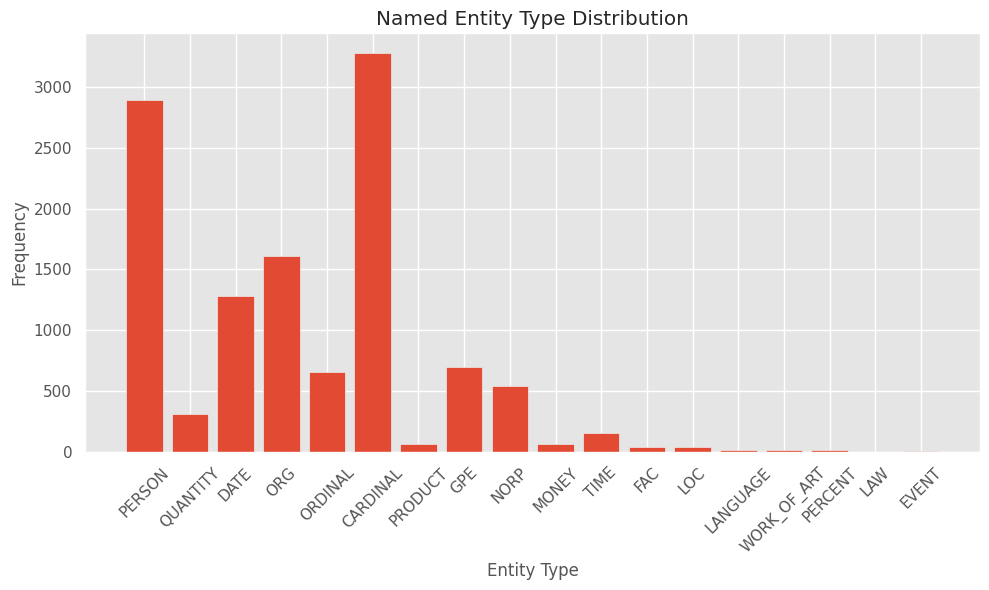

In [195]:
#Visualizing Named Entity Types

import matplotlib.pyplot as plt

# Extract entity types
entity_types = [ent[1] for ent in all_entities]

# Count occurrences of each entity type
entity_type_counts = Counter(entity_types)

# Plot entity type distribution
plt.figure(figsize=(10, 6))
plt.bar(entity_type_counts.keys(), entity_type_counts.values())
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.title('Named Entity Type Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


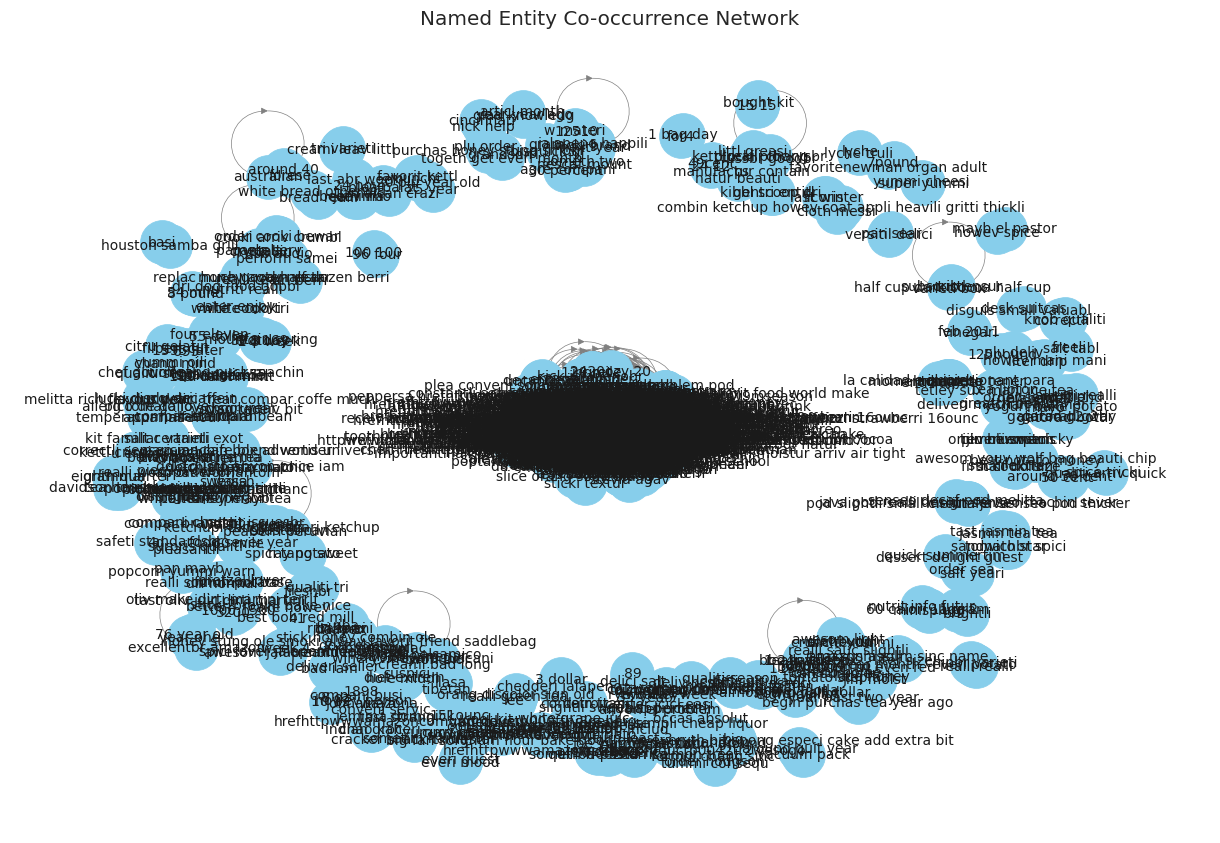

In [201]:
#Entity Network Visualization
from itertools import combinations
from collections import defaultdict

# Create a co-occurrence matrix
co_occurrence_matrix = defaultdict(lambda: defaultdict(int))
for named_entities in full_df['named_entities']:
    for ent1, ent2 in combinations(named_entities, 2):
        co_occurrence_matrix[ent1[0]][ent2[0]] += 1
        co_occurrence_matrix[ent2[0]][ent1[0]] += 1

import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes (entities) and edges (co-occurrences)
for entity, co_occurrences in co_occurrence_matrix.items():
    for co_entity, weight in co_occurrences.items():
        G.add_edge(entity, co_entity, weight=weight)

# Visualize the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=1000, font_size=10, node_color='skyblue', edge_color='gray', width=0.5)
plt.title('Named Entity Co-occurrence Network')
plt.show()

In [208]:
# Define a function to map sentiment labels to numerical values
def map_sentiment_to_number(sentiment_label):
    if sentiment_label == 'Negative':
        return -1
    elif sentiment_label == 'Neutral':
        return 0
    elif sentiment_label == 'Positive':
        return 1
    else:
        return None  # Handle unknown labels if needed

# Initialize defaultdict to store sentiment scores for each named entity
entity_sentiments = defaultdict(list)

# Iterate over each row in the DataFrame
for idx, row in full_df.iterrows():
    # Iterate over named entities in the 'named_entities' column of the current row
    for entity, label in row['named_entities']:
        # Map sentiment label to numerical value and append to the list of sentiment scores for the current entity
        sentiment_value = map_sentiment_to_number(row['sentiment'])
        if sentiment_value is not None:
            entity_sentiments[entity].append(sentiment_value)

# Calculate average sentiment for each named entity
avg_entity_sentiments = {entity: sum(sentiments) / len(sentiments) for entity, sentiments in entity_sentiments.items()}

# Sort entities by average sentiment score in descending order and get the top 5 entities
top_entities = sorted(avg_entity_sentiments.items(), key=lambda x: x[1], reverse=True)[:5]

# Print average sentiment for the top 5 entities
print("Top 5 Entities by Average Sentiment:")
for entity, avg_sentiment in top_entities:
    print(f"Entity: {entity}, Average Sentiment: {avg_sentiment:.2f}")




Top 5 Entities by Average Sentiment:
Entity: citru gelatin, Average Sentiment: 1.00
Entity: filbert cut, Average Sentiment: 1.00
Entity: yummi taffi deliveri quick, Average Sentiment: 1.00
Entity: five pound, Average Sentiment: 1.00
Entity: last two week, Average Sentiment: 1.00


## **Text Classification or Clustering**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the processed text
X = vectorizer.fit_transform(full_df['processed text'])

# Get the sentiment labels
y = full_df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MultinomialNB
clf = MultinomialNB()

# Fit the model
clf.fit(X_train, y_train)

# Predict the sentiment for the test data
y_pred = clf.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print classification report
print(classification_report(y_test, y_pred))

# Print accuracy
print(f'The accuracy of the model is {accuracy}')




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



              precision    recall  f1-score   support

    Negative       0.38      0.10      0.16       156
     Neutral       0.00      0.00      0.00        84
    Positive       0.77      0.97      0.86       760

    accuracy                           0.75      1000
   macro avg       0.38      0.36      0.34      1000
weighted avg       0.64      0.75      0.68      1000

The accuracy of the model is 0.751


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the processed text
X = vectorizer.fit_transform(full_df['processed text'])

# Decide on the number of clusters
num_clusters = 5

# Initialize KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model
kmeans.fit(X)

# Predict the cluster for each document
clusters = kmeans.predict(X)

# Count the number of documents in each cluster
cluster_counts = np.bincount(clusters)

# Print the number of documents in each cluster
for i, count in enumerate(cluster_counts):
  print(f'Cluster {i} has {count} documents')

# Print cluster labels for the first 10 documents
print("Cluster labels for the first 10 documents:")
for i in range(10):
  print(f"Document {i+1} belongs to cluster {clusters[i]}")

# Get cluster centroids
cluster_centers = kmeans.cluster_centers_

# Print the top 3 terms for each cluster (assuming terms are in the vocabulary)
print("\nTop 3 terms for each cluster:")
for i, center in enumerate(cluster_centers):
  # Get top 3 terms (indices) by sorting and selecting the top 3 indices
  top_indices = np.argsort(center)[-3:]
  # Get the terms from the vocabulary based on their indices
  top_terms = vectorizer.get_feature_names_out()[top_indices]
  print(f"Cluster {i}: {', '.join(top_terms)}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Cluster 0 has 288 documents
Cluster 1 has 314 documents
Cluster 2 has 343 documents
Cluster 3 has 3769 documents
Cluster 4 has 286 documents
Cluster labels for the first 10 documents:
Document 1 belongs to cluster 1
Document 2 belongs to cluster 3
Document 3 belongs to cluster 3
Document 4 belongs to cluster 3
Document 5 belongs to cluster 3
Document 6 belongs to cluster 3
Document 7 belongs to cluster 3
Document 8 belongs to cluster 3
Document 9 belongs to cluster 3
Document 10 belongs to cluster 1

Top 3 terms for each cluster:
Cluster 0: cocoa, hot, chocol
Cluster 1: newman, food, dog
Cluster 2: gluten, pancak, mix
Cluster 3: get, buy, love
Cluster 4: drink, green, tea


In [ ]:
pip install scikit-learn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



NameError: name 'cluster_labels' is not defined

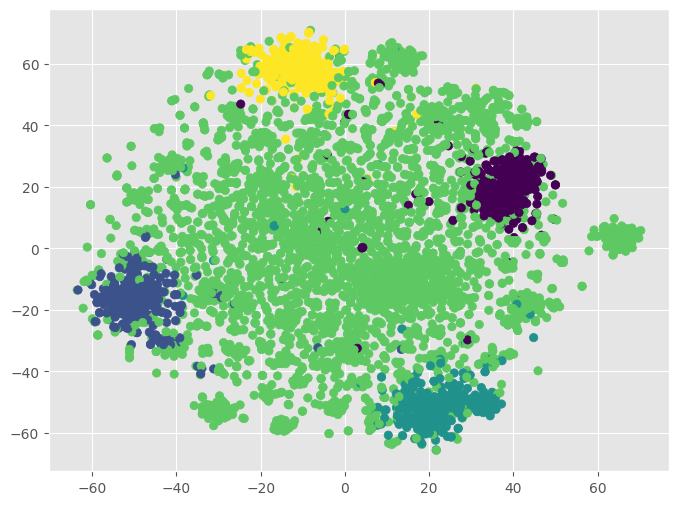

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE  # Import for t-SNE dimensionality reduction
import matplotlib.pyplot as plt



# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(full_df['processed text'])

# Decide on the number of clusters
num_clusters = 5

# KMeans Clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# **Get cluster labels (essential for visualization)**
clusters = kmeans.predict(X)

# Predict the cluster for each document
clusters = kmeans.predict(X)

# Count the number of documents in each cluster
cluster_counts = np.bincount(clusters)

# Get cluster centroids
cluster_centers = kmeans.cluster_centers_

# t-SNE Dimensionality Reduction (adjust perplexity as needed)
perplexity = 30  # Adjust perplexity for better visualization (experiment with values)
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, init="random")  # Use random initialization for sparse matrices
reduced_features = tsne.fit_transform(X)

# Visualization using scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters)

# Add labels for each cluster (optional)
for i, cluster in enumerate(np.unique(clusters)):
  cluster_center = reduced_features[cluster_labels == cluster].mean(axis=0)
  plt.plot(cluster_center[0], cluster_center[1], 'o', markersize=14, markerfacecolor='lightblue', markeredgewidth=2, markeredgecolor='blue')
  plt.text(cluster_center[0], cluster_center[1] + 0.1, f'Cluster {cluster}', ha='center', va='center', fontsize=12, fontweight='bold')

plt.title('Text Clustering Visualization (t-SNE)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()


## **Visualization and Summarization**

## **Word Cloud (Term Frequency Visualization):**

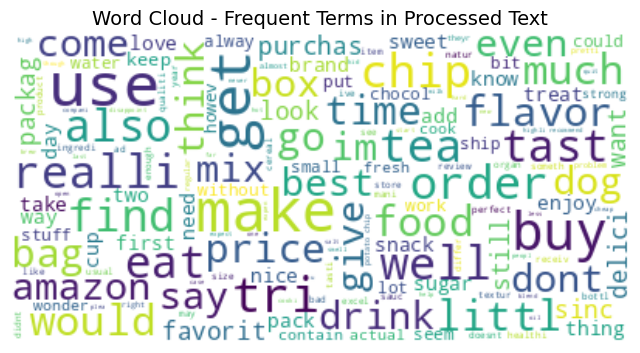

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_column = 'processed text'

# Assuming full_df is a pandas DataFrame
# Check if the 'processed text' column has any missing values
if pd.isnull(full_df[text_column]).any():
  # If there are missing values, handle them gracefully
  text = " ".join(full_df[text_column].fillna(''))
else:
  # If there are no missing values, simply join the text column
  text = " ".join(full_df[text_column])

# Create the WordCloud object with customizable settings
wordcloud = WordCloud(
    background_color="white",
    max_font_size=40,
    stopwords={
        "the", "a", "is", "of", "to", "and", "in", "that", "on", "my", "be", "for", "with", "an"
    },
    colormap="viridis"
)

# Generate the word cloud
wordcloud.generate(text)

# Display the word cloud with a clear title
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Frequent Terms in Processed Text", fontsize=14)
plt.show()


# **Bar Chart (Sentiment Distribution)**

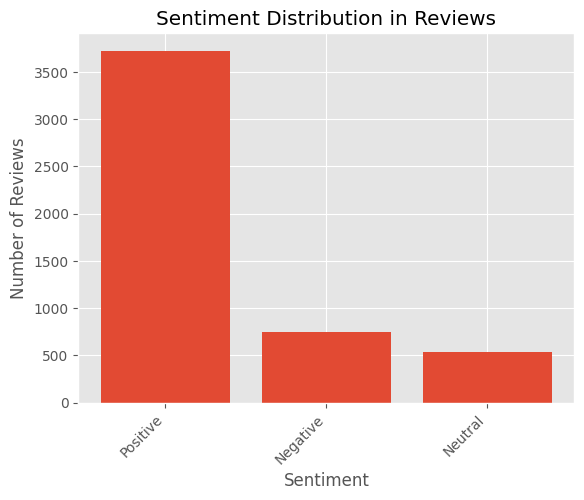

In [ ]:
sentiment_counts = full_df['sentiment'].value_counts().sort_values(ascending=False)

# Create a bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.title("Sentiment Distribution in Reviews")
plt.xticks(rotation=45, ha='right')
plt.show()




## **Heatmap**

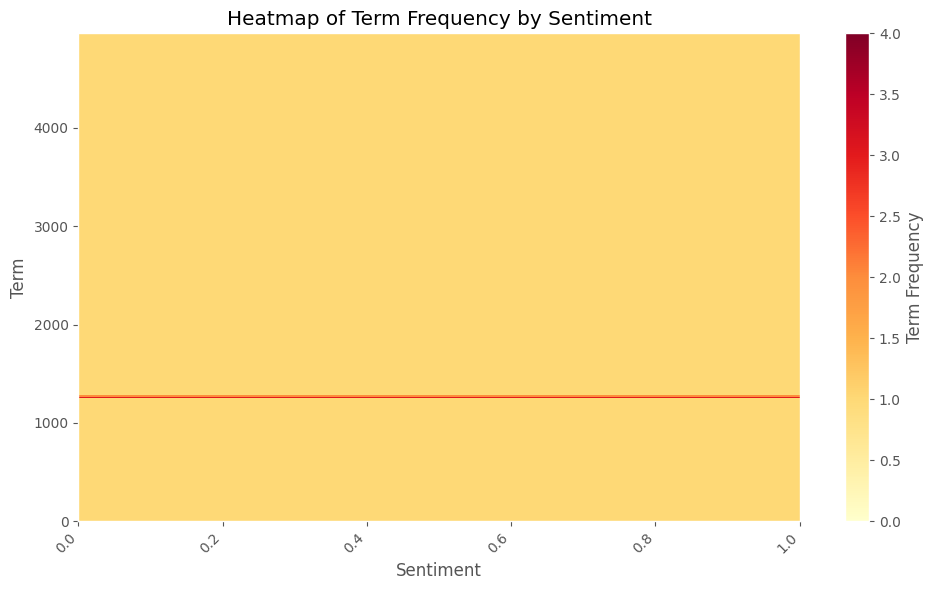

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a function to calculate term frequencies (e.g., using TF-IDF or NLTK)
def calculate_term_frequencies(text_column, category_column):
    term_frequency_df = full_df.groupby(category_column)[text_column].apply(pd.Series.value_counts).fillna(0)
    return term_frequency_df

# Get term frequencies
term_frequency_df = calculate_term_frequencies('processed text', 'sentiment')  # Replace with your function call

# Check DataFrame shape (optional)
if len(term_frequency_df.shape) == 1:
    print("Warning: term_frequency_df has only one dimension. Reshaping...")
    term_frequency_df = term_frequency_df.to_numpy().reshape(-1, 1)

# Create the heatmap
plt.figure(figsize=(10, 6))
ax = plt.pcolor(term_frequency_df, vmin=0, cmap='YlOrRd')  # Use 'YlOrRd' colormap for frequency visualization
plt.colorbar(label='Term Frequency')

# Set labels
plt.xlabel('Sentiment')
plt.ylabel('Term')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

# Set grid and title
plt.grid(False)
plt.title('Heatmap of Term Frequency by Sentiment')
plt.tight_layout()
plt.show()



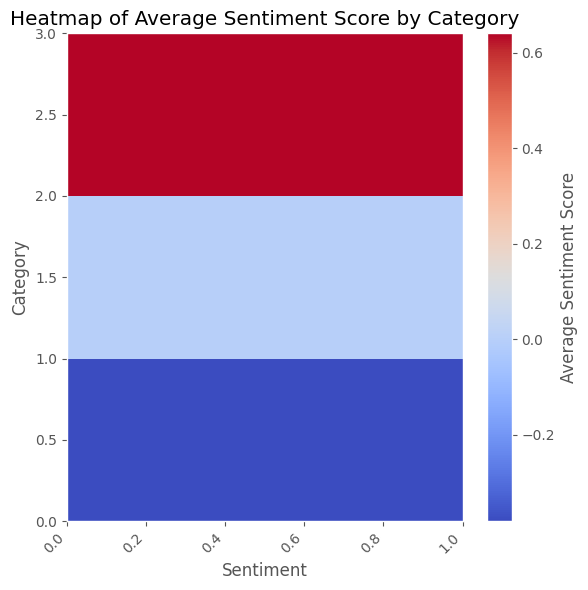

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have columns 'sentiment' (categorical) and 'sentiment_score' (numerical)
pivot_table = pd.pivot_table(full_df, values='sentiment_score', index='sentiment', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(6, 6))
ax = plt.pcolor(pivot_table, vmin=min(pivot_table.values), vmax=max(pivot_table.values), cmap='coolwarm')  # Use 'coolwarm' for sentiment visualization
plt.colorbar(label='Average Sentiment Score')

# Set labels
plt.xlabel('Sentiment')
plt.ylabel('Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

# Set grid and title
plt.grid(False)
plt.title('Heatmap of Average Sentiment Score by Category')
plt.tight_layout()
plt.show()

<ipython-input-252-18b851cec67d>:36: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



<Figure size 1200x800 with 0 Axes>

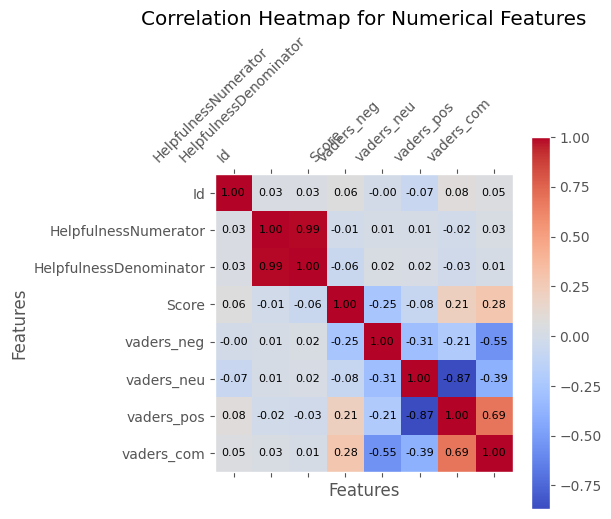

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Select numerical columns (excluding 'sentiment_score')
numerical_cols = full_df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('sentiment_score')  # Exclude sentiment score for this example

# Calculate correlation matrix (assuming numerical_cols contains only numerical columns)
correlation_matrix = full_df[numerical_cols].corr()

# Create a new figure for the plot
plt.figure(figsize=(12, 8))

# Create heatmap using Matplotlib's heatmap function
ax = plt.matshow(correlation_matrix, cmap='coolwarm')

# Add colorbar
plt.colorbar(ax)

# Add labels for each cell (optional)
for (i, j), z in np.ndenumerate(correlation_matrix):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=8)

# Add column labels on x-axis
plt.xticks(range(len(numerical_cols)), numerical_cols, rotation=45, ha='right')

# Add row labels on y-axis
plt.yticks(range(len(numerical_cols)), numerical_cols)

# Set plot title and labels
plt.title('Correlation Heatmap for Numerical Features')
plt.xlabel('Features')
plt.ylabel('Features')

plt.grid(False)
plt.tight_layout()

plt.show()


## **Network Graph**

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


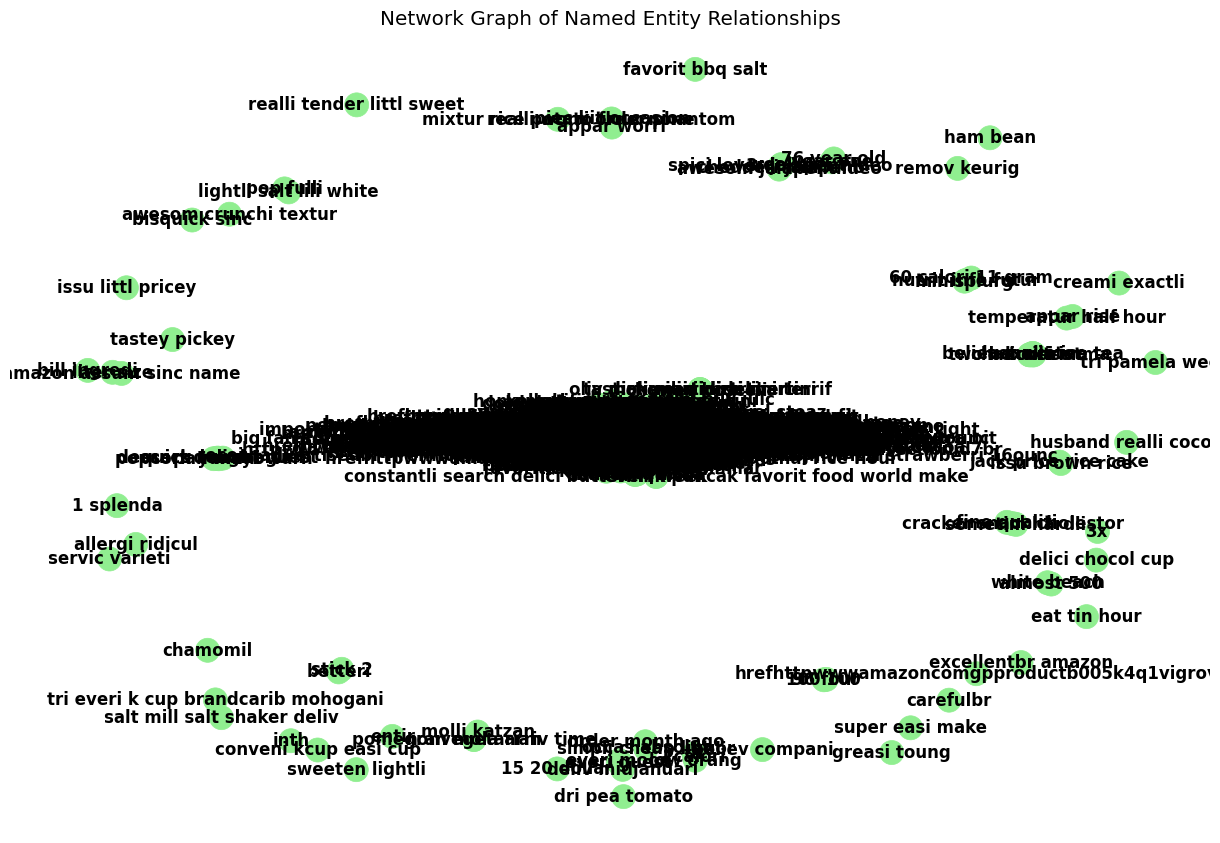

In [ ]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt

# Assuming your DataFrame is 'full_df' and the named entity column is 'named_entities'
entity_df = full_df.explode('named_entities')  # Explode list of named entities into separate rows

# Extract entities and relationships
entities = []
relationships = []
for index, row in entity_df.iterrows():
    try:
        entity, entity_type = row['named_entities']  # Use a try-except block for potential errors
        entities.append(entity)
        relationships.append((entity, entity_type))  # Keep track of entity type for potential coloring
    except TypeError:  # Handle cases where 'named_entities' is not a list
        pass  # Do nothing in case of error (e.g., missing value)

# Create a NetworkX graph
G = nx.Graph()

# Add nodes with entity types (optional for coloring)
for entity, entity_type in zip(entities, relationships):
    G.add_node(entity, entity_type=entity_type)

# Add edges between entities (fixed unpacking)
for index, row in entity_df.iterrows():
    try:
        entity1, _ = row['named_entities']  # Use a try-except block for potential errors
        for other_entity, _ in entity_df.loc[index:, 'named_entities'].tolist():
            if entity1 != other_entity:
                G.add_edge(entity1, other_entity)
    except TypeError:  # Handle cases where 'named_entities' is not a list
        pass  # Do nothing in case of error (e.g., missing value)

# Customize node and edge styles (fixed color assignment)
entity_types = dict(G.nodes(data=True))  # Get all node data as a dictionary

node_colors = [('lightblue' if et['entity_type'] == 'PERSON' else 'lightgreen') for et in entity_types.values()]

# Create the network plot
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Use a layout algorithm (e.g., spring_layout)
nx.draw(G, pos=pos, with_labels=True, node_color=node_colors, cmap='viridis', font_weight='bold')  # Adjust node and edge styles

# Display the plot
plt.title('Network Graph of Named Entity Relationships')
plt.axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



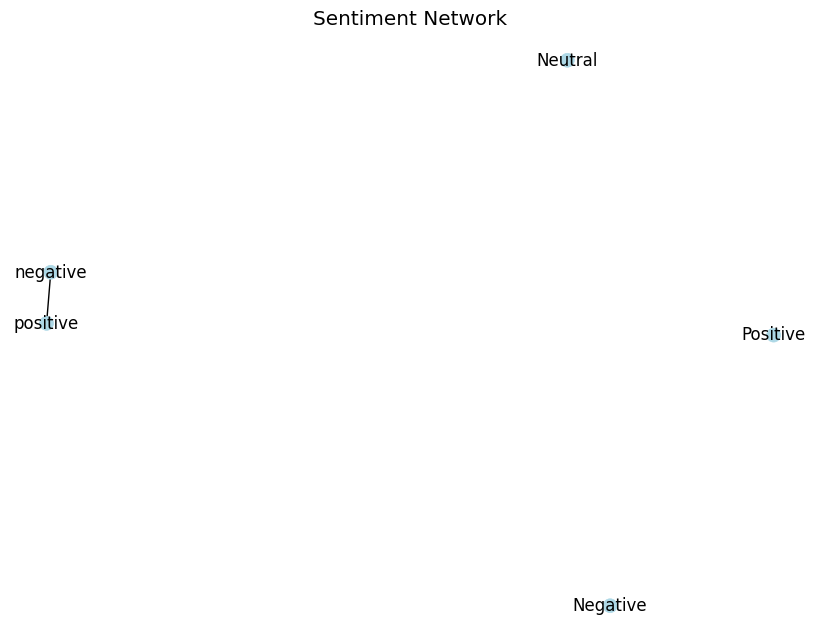

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'sentiment' column has categories like 'positive', 'negative', 'neutral'
sentiment_counts = full_df['sentiment'].value_counts()

# Create an empty graph
G = nx.Graph()

# Filter sentiment categories to match sentiment counts (optional)
sentiment_categories = [cat for cat in sentiment_categories if cat in sentiment_counts.index]
G.add_nodes_from(sentiment_categories)

# Add edges between positive and negative sentiment (modify as needed)
G.add_edge('positive', 'negative', weight=1)  # Adjust weight as needed

# Optional: Add weights to edges based on co-occurrence (more complex)
# ... (code to calculate co-occurrence and set edge weights)

# Layout the graph (different layout algorithms available)
pos = nx.spring_layout(G)  # Example layout using spring_layout

# Calculate node size based on sentiment count (handle potential mismatch)
if len(sentiment_counts.values) == len(G.nodes()):
  node_sizes = [count * 100 for count in sentiment_counts.values]
else:
  # Option 1: Set a default size if counts don't match nodes
  node_sizes = [100] * len(G.nodes())  # Set a single size for all nodes

  # Option 2 (if applicable): Fill missing categories with 0 count
  # missing_categories = [cat for cat in G.nodes() if cat not in sentiment_counts.index]
  # for cat in missing_categories:
  #   sentiment_counts.loc[cat] = 0  # Add missing category with 0 count
  # node_sizes = [count * 100 for count in sentiment_counts.values]

# Create the visualization
plt.figure(figsize=(8, 6))
nx.draw(G, pos=pos, node_color='lightblue', node_size=node_sizes, with_labels=True)

# Optional: Customize labels, colors, edge styles, etc.
# ... (code for customization using matplotlib)

plt.title("Sentiment Network")
plt.axis('off')
plt.show()

